# Equalização de histogramas: implementação e discussões

## Introdução

No âmbito da equalização de histogramas dar-se destaque a técnica que normalização, que pode provê melhoramento de contraste em imagem predominantemente brancas ou escuras. Tal técnicas baseia-se na redistribuição dos valores de intensidade da imagem na escala de cinza.

A aplicação de consiste em uma transformação($T$) na imagem ($g(x,y)$) da seguinte forma:

$$ h(x,y) = T[g(x,y)] $$

No qual ($h(x,y)$) é a imagem após o processo de normalização. Tal transformação($T$) pode ser expressa da seguinte forma:

$$ h(i,j) = \frac{g(i,j) - min(g(x,y)}{max(g(x,y) - min(g(x,y))} \times Imax $$

$$ i = 0,1,2...M $$
$$ j = 0,1,2...N $$

Sendo, $h(i,j)$ o novo pixel da imagem, $g(i,j)$ o pixel da imagem original, $min(g(x,y))$ e $max(g(x,y))$ o mínimo e máximo valor de intensidade na imagem respectivamente, com $i$ e $j$ variando até o tamanho da imagem e $Imax$ a intesidade máxima na nova escala adotada.

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [2]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:

In [3]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

### Aplicação efetida do método:

In [4]:
#############################################################################################
########### Method apllication:

Hist = nf.calcHist(Filter.img)

newImage = nf.eqHist(Filter.img)
newHist = nf.calcHist(newImage)

################################
Process finished
Histogram has been calculated
################################
################################
Process finished
Histogram has been equalized
################################
################################
Process finished
Histogram has been calculated
################################


### Exibir resultados:

- Histograma original e Histograma equalizado
- Imagem original e imagem equalizada

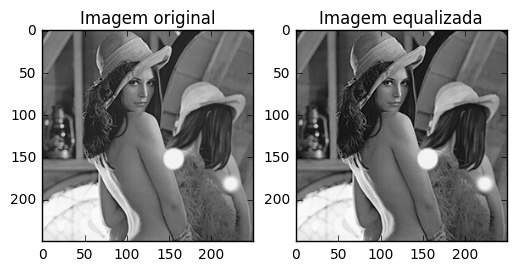

In [5]:
#############################################################################################
########## Plot images:

########## Using matplotlib #################

plt.figure(2)
plt.subplot(121), plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.subplot(121).set_title('Imagem original')
plt.subplot(122), plt.imshow(newImage, vmin=0, vmax=255, cmap='gray')
plt.subplot(122).set_title('Imagem equalizada')

plt.show()

#### Apêndice 01 - Função para cálculo do histograma:

In [6]:
def eqHist (Image):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    A = Image

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Equalize Histogram
    ## Pre-sets:

    newA = np.zeros((size.A.lin, size.A.col))

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            newA[j, k] = np.ceil(255*(
                         (A[j, k] - A.min()) /
                         (A.max() - A.min())))

    newImage = np.uint8(newA)

    print('################################')
    print('Process finished')
    print('Histogram has been equalized')
    print('################################')

    return newImage

# Discussões sobre o método

Para observar a operação de normalização utilizando uma imagem com tonalidades de cinza próximas e bastante distas do branco(255) no exemplo a seguir.

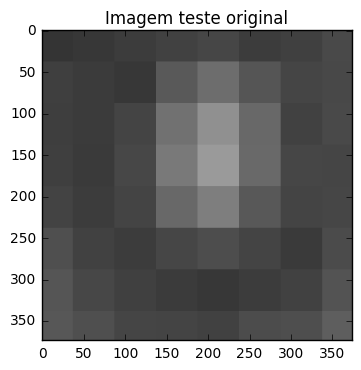

In [7]:
img2 = cv2.imread('example.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, vmin=0, vmax=255, cmap='gray')
plt.title('Imagem teste original')
plt.show()

- Matriz de intensidades da imagem:

In [8]:
print('------------------------------------')
print(img2)
print('------------------------------------')
print('Intensidade máxima: %d' %img2.max())
print('Intensidade mínima: %d' %img2.min())

------------------------------------
[[52 52 52 ..., 73 73 73]
 [52 52 52 ..., 73 73 73]
 [52 52 52 ..., 73 73 73]
 ..., 
 [87 87 87 ..., 94 94 94]
 [87 87 87 ..., 94 94 94]
 [87 87 87 ..., 94 94 94]]
------------------------------------
Intensidade máxima: 154
Intensidade mínima: 52


Ao realizar a normalização da imagem tem-se o seguinte resultado:

In [9]:
Filter.img = np.array(img2)

Hist = nf.calcHist(Filter.img)
newImage = nf.eqHist(Filter.img)
newHist = nf.calcHist(newImage)

################################
Process finished
Histogram has been calculated
################################
################################
Process finished
Histogram has been equalized
################################
################################
Process finished
Histogram has been calculated
################################


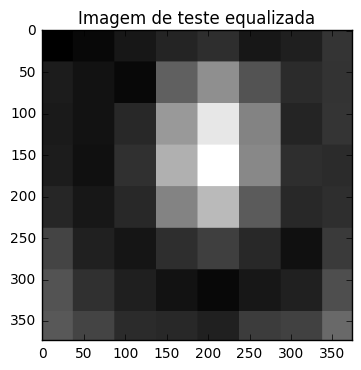

In [10]:
plt.imshow(newImage, vmin=0, vmax=255, cmap='gray')
plt.title('Imagem de teste equalizada')
plt.show()

- Nova matriz de intensidades da imagem:

In [11]:
print('------------------------------------')
print(newImage)
print('------------------------------------')
print('Intensidade máxima: %d' %newImage.max())
print('Intensidade mínima: %d' %newImage.min())

------------------------------------
[[  0   0   0 ...,  53  53  53]
 [  0   0   0 ...,  53  53  53]
 [  0   0   0 ...,  53  53  53]
 ..., 
 [ 88  88  88 ..., 106 106 106]
 [ 88  88  88 ..., 106 106 106]
 [ 88  88  88 ..., 106 106 106]]
------------------------------------
Intensidade máxima: 255
Intensidade mínima: 0


- Histogramas das imagens:

Percebe-se que o histograma original da imagem é bastante concentrado em regiões de intensidade entre 50 e 150, já esperado. Porém, a aplicação da técnica de normalização tornou a distribuiçõa mais homogêna, deixando os valores de intesidade mais distos entre si, como ilutra o histrogram da imagem equalizada.

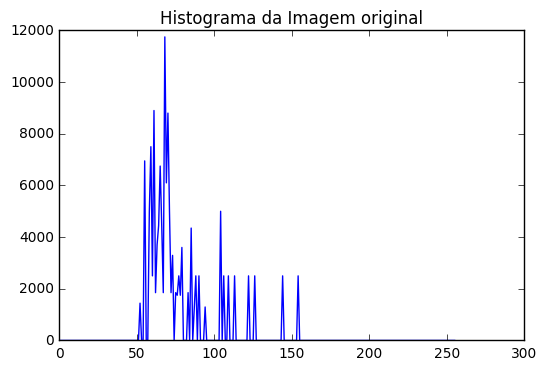

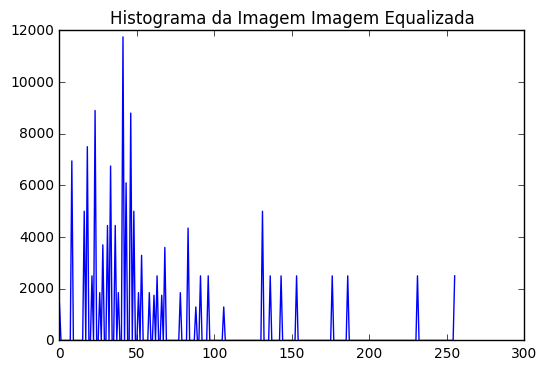

In [12]:
plt.figure(1)
plt.plot(Hist)
plt.title('Histograma da Imagem original')
plt.figure(2)
plt.plot(newHist)
plt.title('Histograma da Imagem Imagem Equalizada')

plt.show()

# Conclusões

A normalização de histogramas permite o equilibrio em regiões que aprensentam valores de intensidade luminosa próximas, tornando a distribuição de intensidade na imagem mais homogênea. A ideia por detrás deste método e tornar maior a diferença entre cores na imagem em questão, aumentando o contraste da mesma.

Porém, é imporante salientar que a efetividade desta técnicas está pautada na escolha de regiões que apresentem valores de intesidade próximos entre si, como no exemplo anterior. Esta operação não surtiu efeito ao aplicar-se em uma imagem por completa e com grande faixa de valores de intensidade.